In [ ]:
pip install pysentimiento

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.8 MB/s eta 0:00:00


In [ ]:
from pysentimiento import create_analyzer
modelo_analise = create_analyzer(task='sentiment', lang='pt')

config.json:   0%|          | 0.00/952 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/540M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/562 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/799k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/22.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
import pandas as pd

In [ ]:
df_resenhas = pd.read_csv('resenhas_produto.csv')
df_resenhas.head()

,ID Cliente,Resenha
0,1918,Ele não deu conta de uma banana cortada em rod...
1,2204,Achei o produto péssimo! não consegue bater vá...
2,1176,A entrega foi realizada rapidamente. além diss...
3,1238,"Ele funciona, mas tem outras variações no merc..."
4,1878,Deixei carregando por 3hs da primeira vez. Con...


In [ ]:
resultado_analise = modelo_analise.predict(df_resenhas['Resenha'])
resultado_analise

Map:   0%|          | 0/40 [00:00<?, ? examples/s]

[AnalyzerOutput(output=NEU, probas={NEU: 0.765, NEG: 0.213, POS: 0.022}),
 AnalyzerOutput(output=NEG, probas={NEG: 0.992, NEU: 0.005, POS: 0.003}),
 AnalyzerOutput(output=POS, probas={POS: 0.616, NEU: 0.352, NEG: 0.032}),
 AnalyzerOutput(output=NEU, probas={NEU: 0.949, NEG: 0.039, POS: 0.012}),
 AnalyzerOutput(output=NEG, probas={NEG: 0.538, NEU: 0.368, POS: 0.093}),
 AnalyzerOutput(output=NEG, probas={NEG: 0.963, NEU: 0.024, POS: 0.013}),
 AnalyzerOutput(output=POS, probas={POS: 0.992, NEU: 0.006, NEG: 0.002}),
 AnalyzerOutput(output=POS, probas={POS: 0.988, NEU: 0.010, NEG: 0.002}),
 AnalyzerOutput(output=POS, probas={POS: 0.948, NEU: 0.047, NEG: 0.006}),
 AnalyzerOutput(output=NEG, probas={NEG: 0.681, NEU: 0.296, POS: 0.023}),
 AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.010, POS: 0.005}),
 AnalyzerOutput(output=POS, probas={POS: 0.993, NEU: 0.006, NEG: 0.002}),
 AnalyzerOutput(output=NEG, probas={NEG: 0.962, POS: 0.021, NEU: 0.017}),
 AnalyzerOutput(output=POS, probas={PO

In [ ]:
classificacao = []
for resultado in resultado_analise:
    classificacao.append(resultado.output)
classificacao

['NEU',
 'NEG',
 'POS',
 'NEU',
 'NEG',
 'NEG',
 'POS',
 'POS',
 'POS',
 'NEG',
 'NEG',
 'POS',
 'NEG',
 'POS',
 'POS',
 'NEU',
 'POS',
 'NEG',
 'NEU',
 'POS',
 'POS',
 'POS',
 'POS',
 'NEG',
 'POS',
 'NEG',
 'NEG',
 'POS',
 'NEG',
 'POS',
 'NEU',
 'NEG',
 'POS',
 'NEU',
 'NEG',
 'POS',
 'POS',
 'POS',
 'NEG',
 'POS']

In [ ]:
df_resenhas['Classificação'] = classificacao
df_resenhas

,ID Cliente,Resenha,Classificação
0,1918,Ele não deu conta de uma banana cortada em rod...,NEU
1,2204,Achei o produto péssimo! não consegue bater vá...,NEG
2,1176,A entrega foi realizada rapidamente. além diss...,POS
3,1238,"Ele funciona, mas tem outras variações no merc...",NEU
4,1878,Deixei carregando por 3hs da primeira vez. Con...,NEG
5,1292,"Ele não bate nada, raramente você consegue lig...",NEG
6,1225,"Veio super bem embalado, bate super bem, é prá...",POS
7,1568,"Adorei a aquisição. Ótima potência e tamanho, ...",POS
8,1508,o produto superou minhas expectativas. e fácil...,POS
9,1182,Eu não consegui usar o produto pois eu carregu...,NEG


In [ ]:
df_classificacao = df_resenhas.groupby('Classificação').size().reset_index(name='Contagem')
df_classificacao.head()

,Classificação,Contagem
0,NEG,14
1,NEU,6
2,POS,20


In [ ]:
import plotly.express as px
fig = px.bar(df_classificacao, x='Classificação', y='Contagem', title='Contagem de Resenhas por Classificação')
fig.show()

In [ ]:
import nltk
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')
portuguese_stopwords = set(stopwords.words('portuguese'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
def nuvem_palavras(texto, coluna_texto, classificacao):
 # Filtrando as resenhas com base na classificação especificada
 texto_classificacao = texto.query(f"Classificação == '{classificacao}'")[coluna_texto]
 # Unindo todas as resenhas em uma única string
 texto_unido = " ".join(texto_classificacao)
 # Dividindo o texto em palavras e filtrando com stopwords
 palavras = texto_unido.split()
 palavras_filtradas = [palavra for palavra in palavras if palavra not in portuguese_stopwords]
 texto_filtrado = " ".join(palavras_filtradas)
 # Criando e exibindo a nuvem de palavras
 nuvem_palavras = WordCloud(width=800, height=500, max_words=50).generate(texto_filtrado)
 plt.figure(figsize=(10, 7))
 plt.imshow(nuvem_palavras, interpolation='bilinear')
 plt.axis('off')
 plt.show()

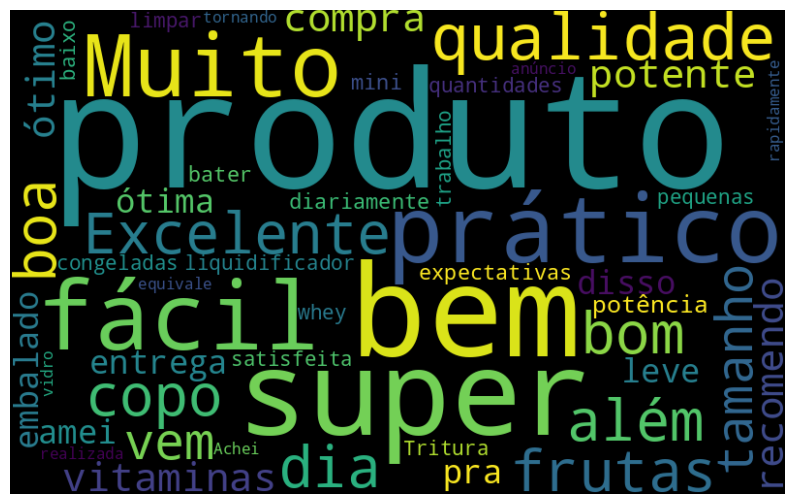

In [ ]:
nuvem_palavras(df_resenhas, 'Resenha', 'POS')

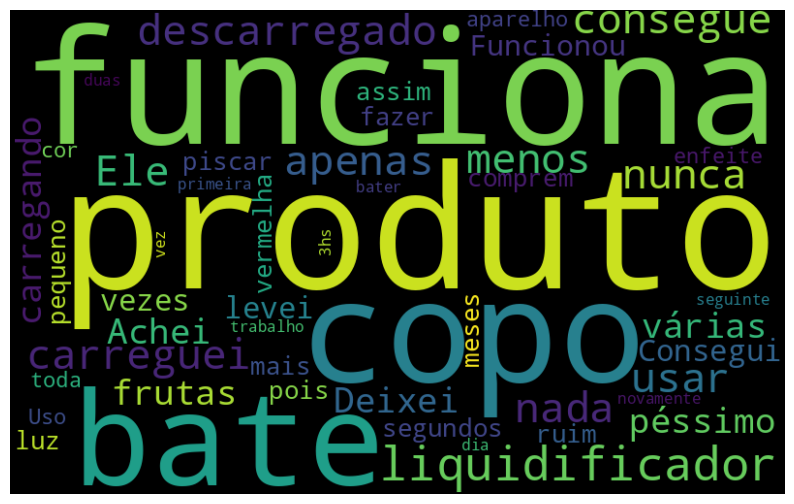

In [ ]:
nuvem_palavras(df_resenhas, 'Resenha', 'NEG')